In [9]:
import pandas as pd

url = "https://docs.google.com/spreadsheets/d/15nZzk6lRvmfWYaAhY0dd4oKpk02iAP6iM7AOLBk4Jn8/export?format=xlsx"
df = pd.read_excel(url)

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://docs.google.com/spreadsheets/d/15nZzk6lRvmfWYaAhY0dd4oKpk02iAP6iM7AOLBk4Jn8/export?format=xlsx"
df = pd.read_excel(url)

df.columns = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

target_classes = ['Iris-setosa', 'Iris-versicolor']
df = df[df['Species'].isin(target_classes)].copy()

# Map to 0 and 1
df['class'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1})

# Shuffle
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Select Features (Dropping 'Id' and 'Species')
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['class'].values

# Split 80/20
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

print(f"Data Loaded :)")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

Data Loaded :)
X_train shape: (80, 4)
y_train shape: (80,)


In [11]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

def step_function(z):
  return 1 if z >= 0 else 0

Epoch 0, MSE: 0.25
Epoch 20000, MSE: 0.16042557253334094
Epoch 40000, MSE: 0.11043469135372586
Epoch 60000, MSE: 0.08147119519711869
Epoch 80000, MSE: 0.06350498037219479
Final Weights: [-0.12817359 -0.47437374  0.72428795  0.30988592]
Final Bias:    -0.0805
Testing on Unseen Data
Test Accuracy: 100.00%


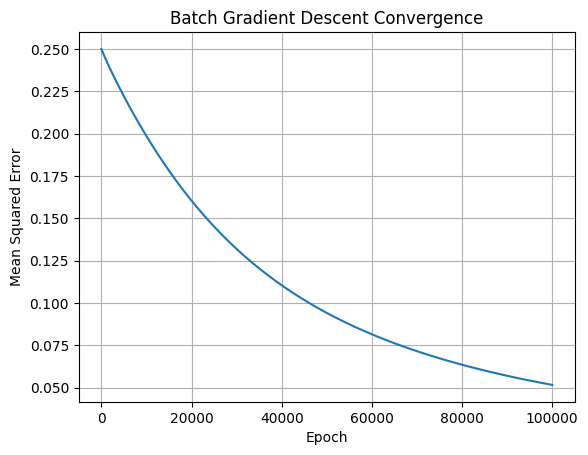

In [12]:
n_samples, n_features = X_train.shape
weights = np.zeros(X_train.shape[1])
bias = 0.0
learning_rate = 0.0001
epochs = 100000
mse_history = []

for epoch in range(epochs):
  sum_gradient_w = np.zeros(n_features)
  sum_gradient_b = 0.0
  sum_squared_error = 0.0

  for i in range(n_samples):
    xi = X_train[i]
    target = y_train[i]

    z = np.dot(xi, weights)+bias
    output = sigmoid(z)

    error = target - output
    sum_squared_error += error ** 2

    d_sigmoid = output * (1- output)

    gradient_term = -(error)*d_sigmoid

    sum_gradient_w += gradient_term * xi
    sum_gradient_b += gradient_term * 1.0

  mean_gradient_w = sum_gradient_w / n_samples
  mean_gradient_b = sum_gradient_b / n_samples

  weights = weights - (learning_rate * mean_gradient_w)
  bias = bias - (learning_rate * mean_gradient_b)

  mse = sum_squared_error / n_samples
  mse_history.append(mse)

  if epoch % 20000 == 0:
    print(f"Epoch {epoch}, MSE: {mse}")


print(f"Final Weights: {weights}")
print(f"Final Bias:    {bias:.4f}")

print("Testing on Unseen Data")
correct_predictions = 0

for i in range(len(X_test)):
  xi = X_test[i]
  target = y_test[i]
  z = np.dot(xi,weights)+bias
  prediction = step_function(z)

  if prediction == target:
    correct_predictions += 1

accuracy = (correct_predictions / len(X_test)) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

plt.plot(mse_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Batch Gradient Descent Convergence')
plt.grid(True)
plt.show()




Question 2


In [13]:
import numpy as np

class MLP:
  def __init__(self):
    self.input_layer = np.array([1.0,0.7,1.2])
    self.target = np.array([1.0,0.0])

    self.W1 = np.array([
            [0.5, 1.5, 0.8],
            [0.8, 0.2, -1.6]
        ])
    self.W2 = np.array([
            [0.9, -1.7, 1.6],
            [1.2, 2.1, -0.2]
        ])

    self.learning_rate = 0.5

  def sigmoid(self,x):
    return 1/(1+np.exp(-x))

  def sigmoid_derivative(self, x):
    return x*(1-x)

  def forward_pass(self):
    self.hidden_input = np.dot(self.W1, self.input_layer)
    self.hidden_output = self.sigmoid(self.hidden_input)

    self.hidden_output_with_bias = np.insert(self.hidden_output,0,1.0)
    self.final_input = np.dot(self.W2, self.hidden_output_with_bias)
    self.final_output = self.sigmoid(self.final_input)

    return self.final_output

  def compute_loss(self, predicted, actual):

      error = np.mean(np.square(actual - predicted))
      return error

  def backpropagation(self):

      output_error = self.final_output - self.target
      output_delta = output_error * self.sigmoid_derivative(self.final_output)

      w2_gradients = np.outer(output_delta, self.hidden_output_with_bias)

      hidden_error = np.dot(self.W2[:, 1:].T, output_delta)


      hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)


      w1_gradients = np.outer(hidden_delta, self.input_layer)


      self.W2 = self.W2 - (self.learning_rate * w2_gradients)
      self.W1 = self.W1 - (self.learning_rate * w1_gradients)

  def train(self, epochs=10000):
      print(f"Initial Target: {self.target}")

      for epoch in range(epochs):

          prediction = self.forward_pass()

          # 2. Loss
          loss = self.compute_loss(prediction, self.target)

          # 3. Backward (Update weights)
          self.backpropagation()

          # Convergence Check (Stop if error is extremely small)
          if loss < 0.00001:
              print(f"Converged at Epoch {epoch}")
              break

          if epoch % 1000 == 0:
              print(f"Epoch {epoch} | Loss: {loss:.6f} | Pred: {prediction}")

      print("\nFinal Result:")
      print(f"Prediction: {prediction}")
      print(f"Target:     {self.target}")
      print(f"Final W1:\n{self.W1}")
      print(f"Final W2:\n{self.W2}")

# Run the Neural Network
mlp = MLP()
mlp.train()

Initial Target: [1. 0.]
Epoch 0 | Loss: 0.613363 | Pred: [0.44137071 0.95637774]
Epoch 1000 | Loss: 0.000399 | Pred: [0.98078457 0.02072008]
Epoch 2000 | Loss: 0.000196 | Pred: [0.98629804 0.01431737]
Epoch 3000 | Loss: 0.000130 | Pred: [0.98877781 0.01158188]
Epoch 4000 | Loss: 0.000097 | Pred: [0.99026615 0.00997619]
Epoch 5000 | Loss: 0.000077 | Pred: [0.99128595 0.0088902 ]
Epoch 6000 | Loss: 0.000064 | Pred: [0.99204079 0.00809336]
Epoch 7000 | Loss: 0.000055 | Pred: [0.99262861 0.00747675]
Epoch 8000 | Loss: 0.000048 | Pred: [0.99310315 0.00698138]
Epoch 9000 | Loss: 0.000043 | Pred: [0.99349668 0.00657217]

Final Result:
Prediction: [0.99382962 0.00622707]
Target:     [1. 0.]
Final W1:
[[ 0.08487218  1.20941053  0.30184662]
 [ 2.00662903  1.04464032 -0.15204516]]
Final W2:
[[ 2.69025421 -0.20107984  2.74738711]
 [-2.22135782 -0.73682723 -2.44958124]]
